In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import deque
from scipy import stats
import sys

In [48]:
alpha = 11
_lambda = 13
B = 1
N = 100000 + B
epsilon = 0.01
L = 100

In [49]:
def h(x):
    return (_lambda * x) - ((alpha - 1) * np.log(x))  

In [50]:
def h_prime(x):
    return _lambda - ((alpha - 1) / x)

In [51]:
def leapfrog(theta, p):
    half_next_p = p - (epsilon / 2) * h_prime(theta)
    next_theta = theta + epsilon * half_next_p
    next_p = half_next_p - (epsilon / 2) * h_prime(next_theta)
    return (next_p, next_theta)

In [52]:
def hamiltonian(theta, p):
    return h(theta) + ((p ** 2) / 2)

In [53]:
def r(theta1, p1, theta2, p2):
    return (
        np.exp(hamiltonian(theta1, p1) - hamiltonian(theta2, p2))
    )

In [56]:
last_theta = 2.5
data = deque([last_theta])
accept_count = 1

for i in range(2, N):
    if not i % 1000: # 進捗用
        sys.stdout.write("%s / %s %s %%  \r" % (i, N, np.round(100 * (i / N), decimals=2)))

    start_p = p = np.random.normal()
    start_theta = theta = data[len(data) - 1]
    
    for j in range(L):
        p, theta = leapfrog(theta, p)
        
    if np.random.rand() < r(start_theta, start_p, theta, p):
        data.append(theta)
        accept_count = accept_count + 1
    else:
        data.append(start_theta)

        accept_count = accept_count + 1
        
print("\nacceptance ratio: %s " % str(accept_count / N))

100000 / 100001 100.0 %  
acceptance ratio: 0.999990000099999 


In [44]:
pd.Series(data).plot()

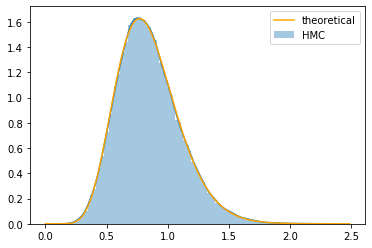

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.distplot(list(data)[B:],bins=100, label='HMC', ax=ax)
arr = np.arange(0, 2.5, 0.01)
sns.lineplot(
    data=pd.DataFrame(
        data=stats.gamma.pdf(arr, alpha, scale=1/_lambda),
        index=arr,
        columns=['theoretical']
    ),
    ax=ax,
    palette=['orange']
)